# Results of Perturbation Effectiveness Testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
os.chdir("..")
PATH = os.getcwd()

## Tabular Data

In [3]:
cls_data =['breast_cancer', 'compas', 'diabetes', 'income', 'iris', "mushroom", "nursery"]
models = ["logit", 'decision_tree', "nb"]
perm_methods = ["permutation", "baseline_min", "baseline_mean", "baseline_max", "baseline_0"]

df = pd.DataFrame()
for data in cls_data:
    data_df = pd.DataFrame()
    for model in models:
        model_df = pd.DataFrame()
        for method in perm_methods:
            csv = pd.read_csv(os.path.join(data, model, method+"_results.csv"), sep=";")
            csv["Method"] = method
            model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        data_df = pd.concat([model_df, data_df], axis=0, ignore_index=False, join="outer")
    data_df["Data"] = data
    df = pd.concat([data_df, df], axis=0, ignore_index=False, join="outer")
df.fillna(0, inplace=True)

print(df.groupby(["Data", "Method", "Model"]).agg({'MAPE Correctness': ["mean"]}).round(4))
print(df.groupby(["Data", "Method", "Model"]).agg({'RMSE Correctness': ["mean"]}).round(4))
print(df.groupby(["Data", "Method", "Model"]).agg({'R2 Correctness': ["mean"]}).round(4))

    

print("-----------------%s-----------------" %(data))

                                         MAPE Correctness
                                                     mean
Data          Method       Model                         
breast_cancer baseline_0   decision_tree           0.4912
                           logit                   0.5010
                           nb                      0.0580
              baseline_max decision_tree           0.2606
                           logit                   0.5416
...                                                   ...
nursery       baseline_min logit                   0.0942
                           nb                      0.1950
              permutation  decision_tree           1.0000
                           logit                   0.9744
                           nb                      0.8954

[105 rows x 1 columns]
                                         RMSE Correctness
                                                     mean
Data          Method       Model                

In [4]:
df.groupby(["Method", "Data", "Model"]).agg({'MAPE Correctness': ["mean"], 'RMSE Correctness': ["mean"],
                                            'R2 Correctness': ["mean"]}).stack().unstack(0).round(4).to_csv("results/tab_perm_fid_results.csv")

## Event Logs

In [5]:
cls_data =['bpic2012', 'production', 'sepsis_cases']
preprocs = ["single_agg", "prefix_agg", "prefix_index"]
models = ["logit", 'decision_tree', "nb"]
perm_methods = ["permutation", "baseline_min", "baseline_mean", "baseline_max", "baseline_0"]

df = pd.DataFrame()
for data in cls_data:
    for model in models:
        model_df = pd.DataFrame()
        for preproc in preprocs:
            num_buckets = len([name for name in os.listdir(os.path.join('%s/%s/%s/pipelines'% 
                                                                    (data, model, preproc)))])
            for bucket in range(1, num_buckets+1):
                for method in perm_methods:
                    csv = pd.read_csv(os.path.join(data, model, preproc, "samples/%s_results_bucket_%s.csv" 
                                                   %(method,bucket)), sep=";")
                    #csv["Method"] = method
                    csv["Pre-processing"] = preproc
                    csv["bucket"] = bucket
                    model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
                    #print(model_df.columns)
        model_df["Model"] = model
        model_df["Data"] = data
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")

df.fillna(0, inplace=True)
for index, group in df.groupby("Mode"):
    print(index)
    print(group.groupby(["Pre-processing", "Data", "Model"]).agg({'R2 Correctness': ["mean", "std"]}).round(4))

baseline_0
                                          R2 Correctness        
                                                    mean     std
Pre-processing Data         Model                               
prefix_agg     bpic2012     decision_tree        -0.5655  0.3443
                            logit                -0.0686  0.3361
                            nb                   -0.1576  0.2596
               production   decision_tree        -0.4389  0.3827
                            logit                -0.1474  0.1157
                            nb                   -0.0048  0.1019
               sepsis_cases decision_tree        -0.3903  0.3754
                            logit                -0.0898  0.1081
                            nb                   -0.0220  0.0620
prefix_index   bpic2012     decision_tree        -0.5321  0.4136
                            logit                -0.1643  0.3734
                            nb                   -0.0868  0.2833
              

In [6]:
df.groupby(["Mode","Pre-processing", "Data", "Model"]).agg({'MAPE Correctness': ["mean"], 'RMSE Correctness': ["mean"],
                                            'R2 Correctness': ["mean"]}).stack().unstack(0).round(4).to_csv("results/el_perm_fid_results.csv")

In [7]:
preproc_map = {"single_agg": "Single & Aggregate", "prefix_agg": "Prefix & Aggregate", "prefix_index": "Prefix & Index"}
preprocessing = [preproc_map[preproc] for preproc in df["Pre-processing"]]

perm_method_map = {"baseline_0": "Zero", "baseline_mean": "Mean", "baseline_max": "Maximum", 
                   "baseline_min": "Minimum", "permutation": "Random Permutation"}

bpic2012_decision_tree_prefix_agg.pdf


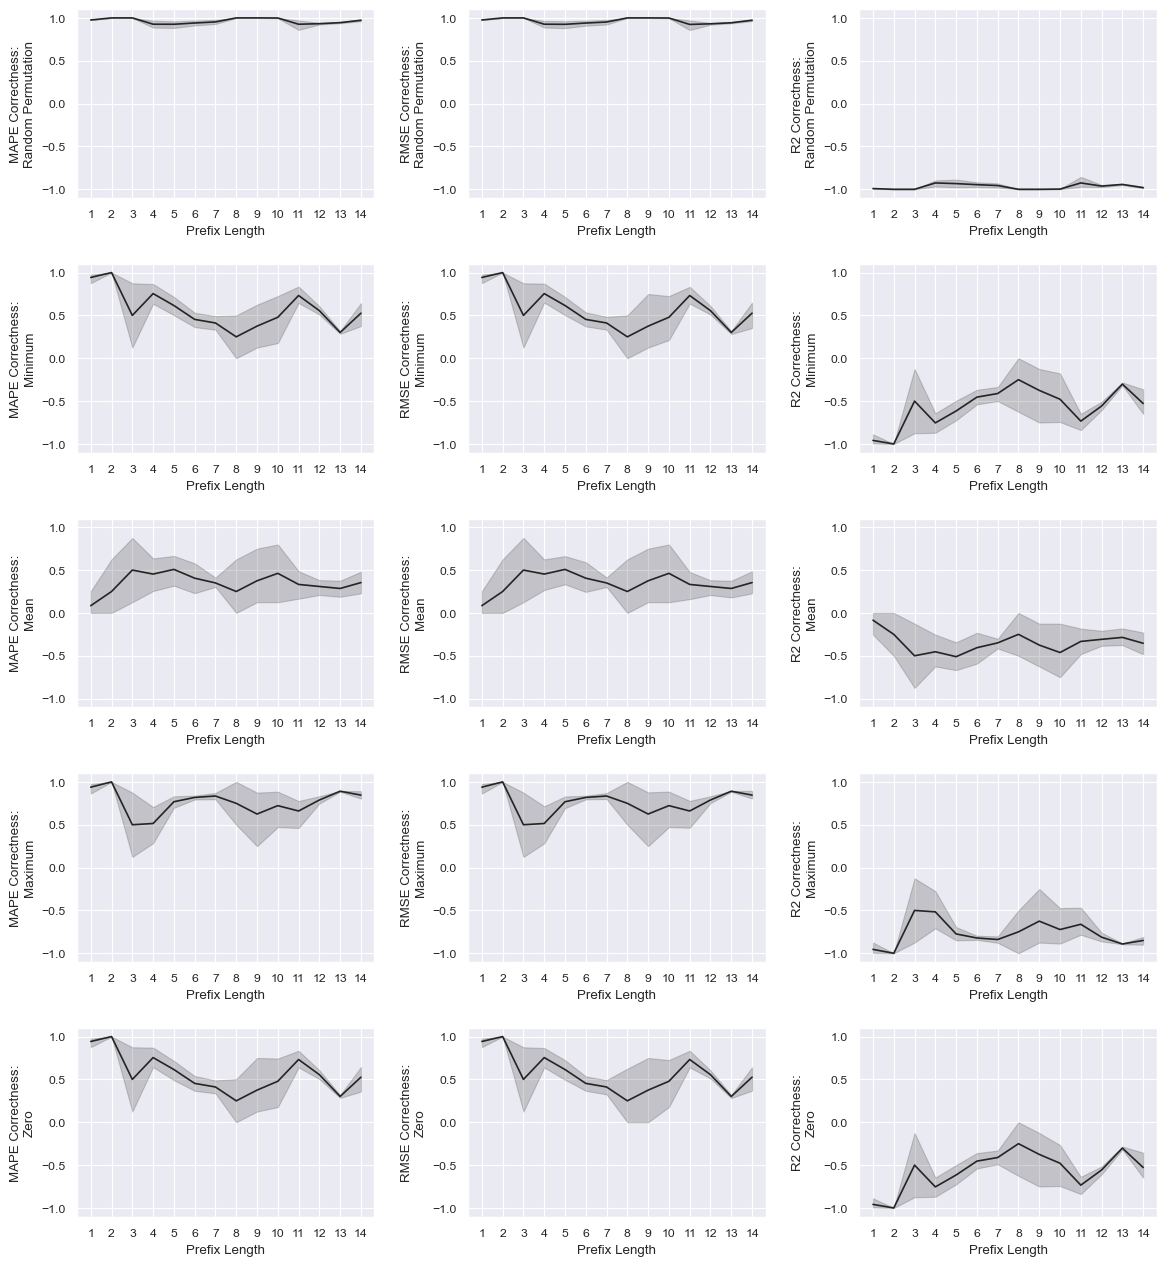

bpic2012_decision_tree_prefix_index.pdf


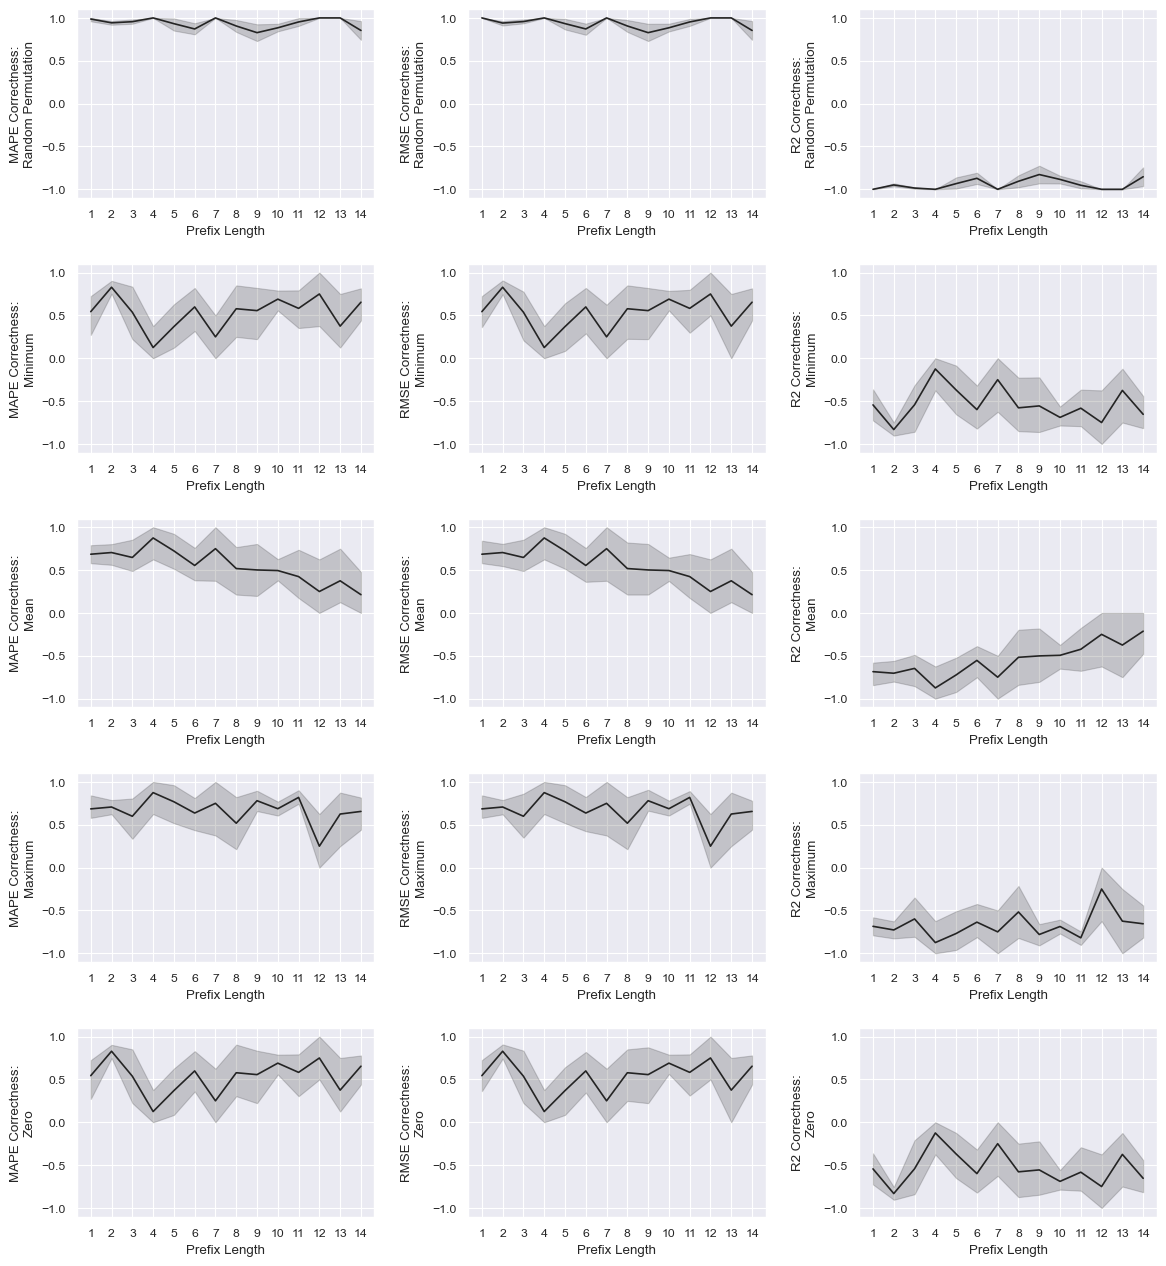

bpic2012_decision_tree_single_agg.pdf


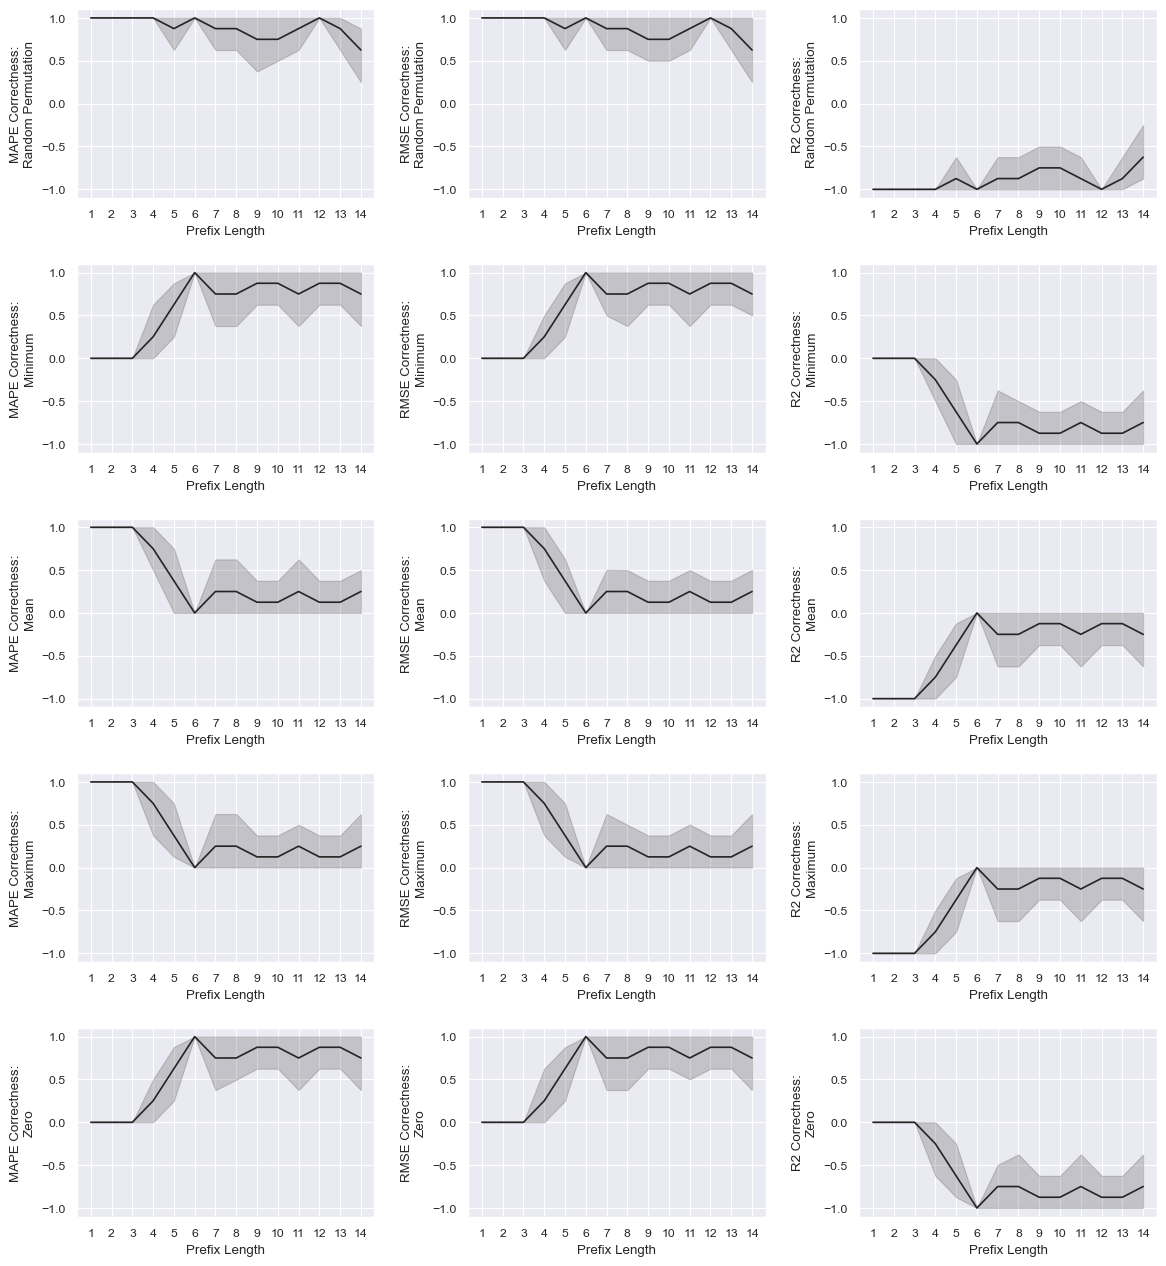

bpic2012_logit_prefix_agg.pdf


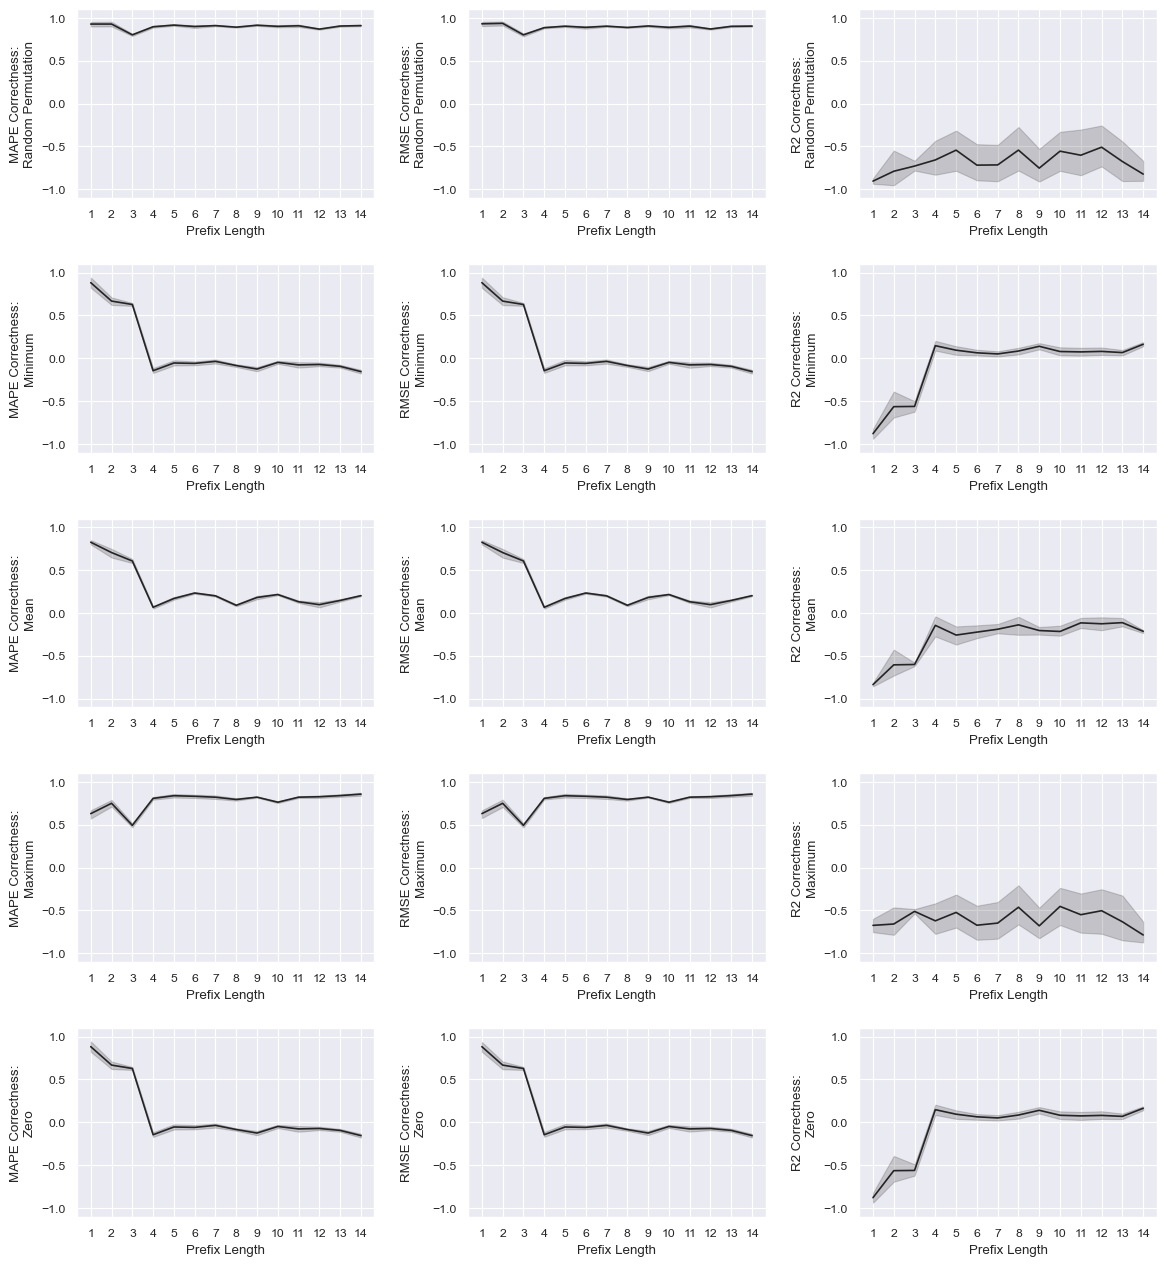

bpic2012_logit_prefix_index.pdf


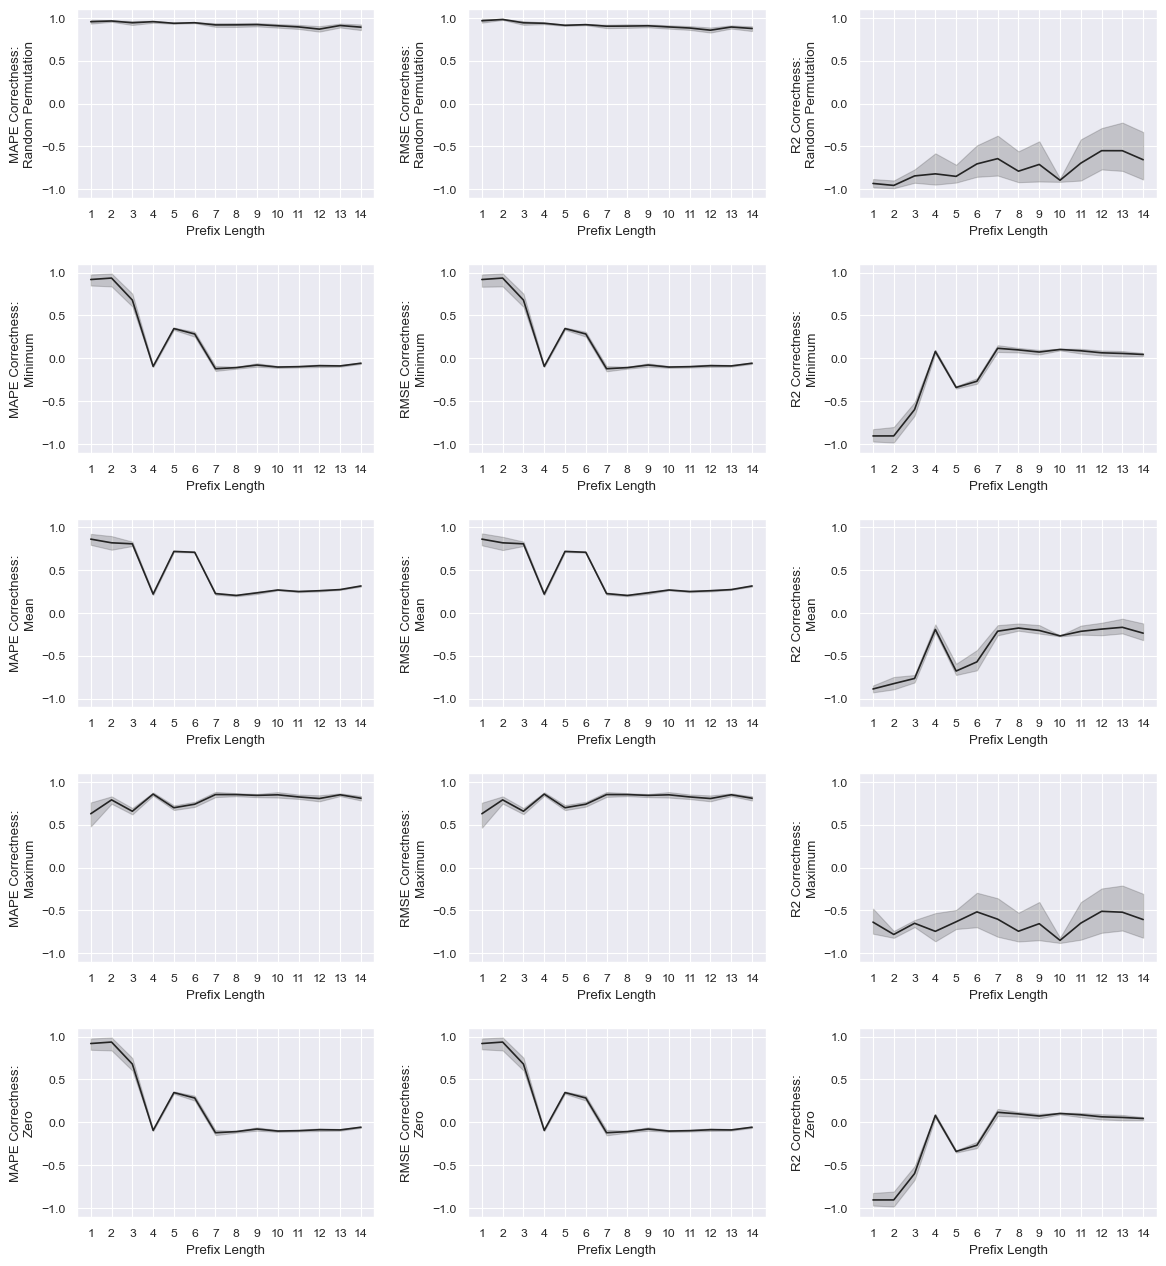

bpic2012_logit_single_agg.pdf


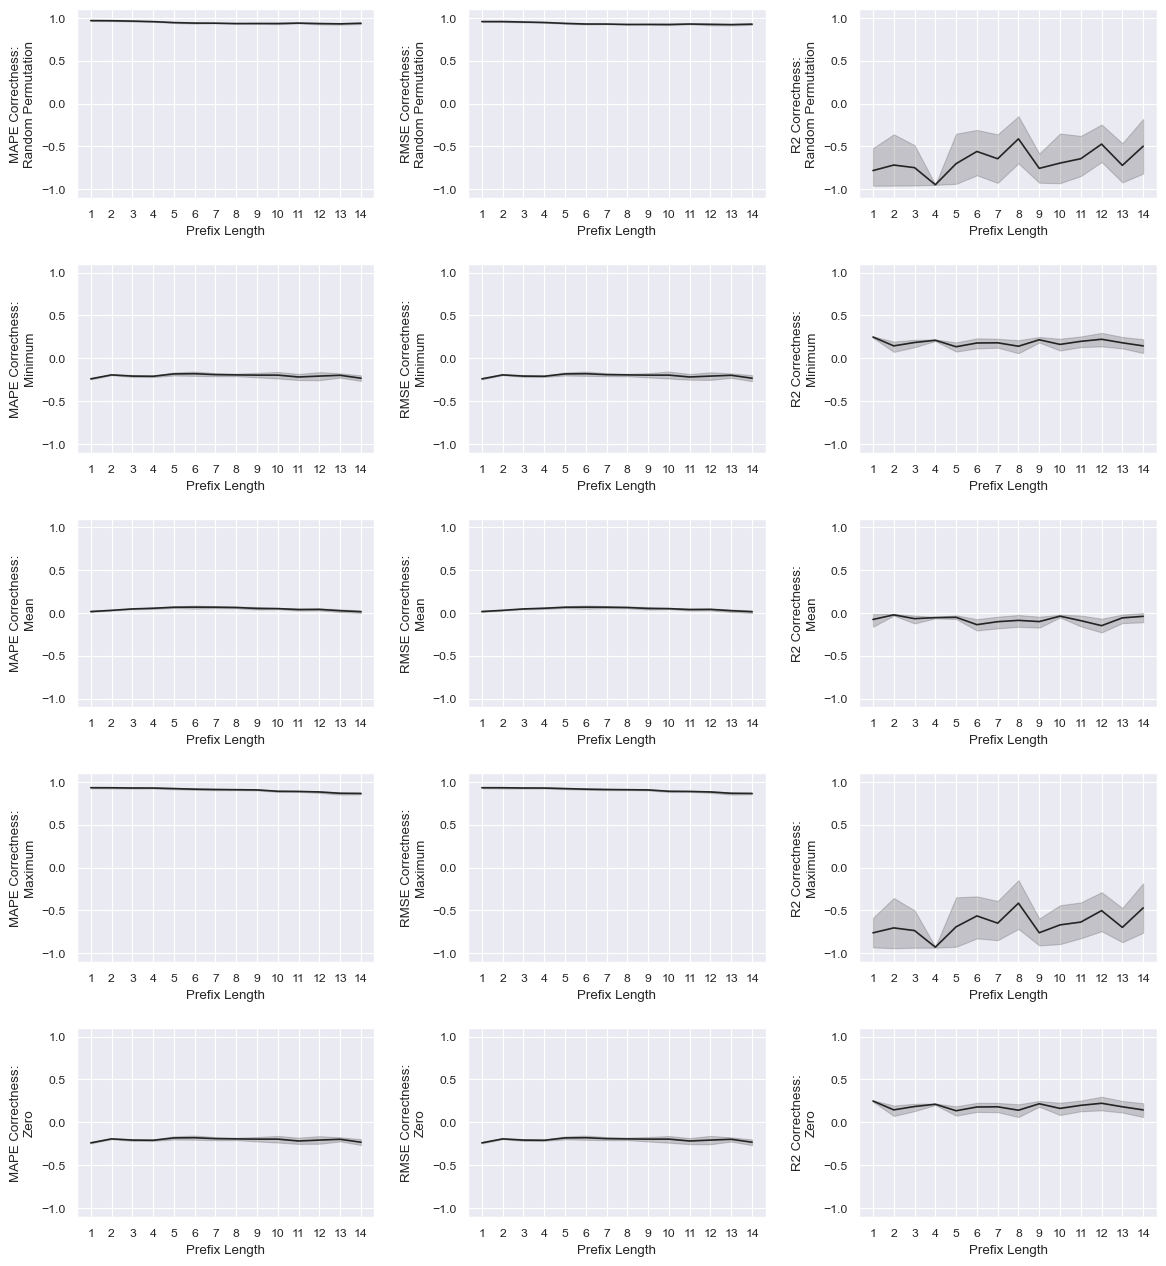

bpic2012_nb_prefix_agg.pdf


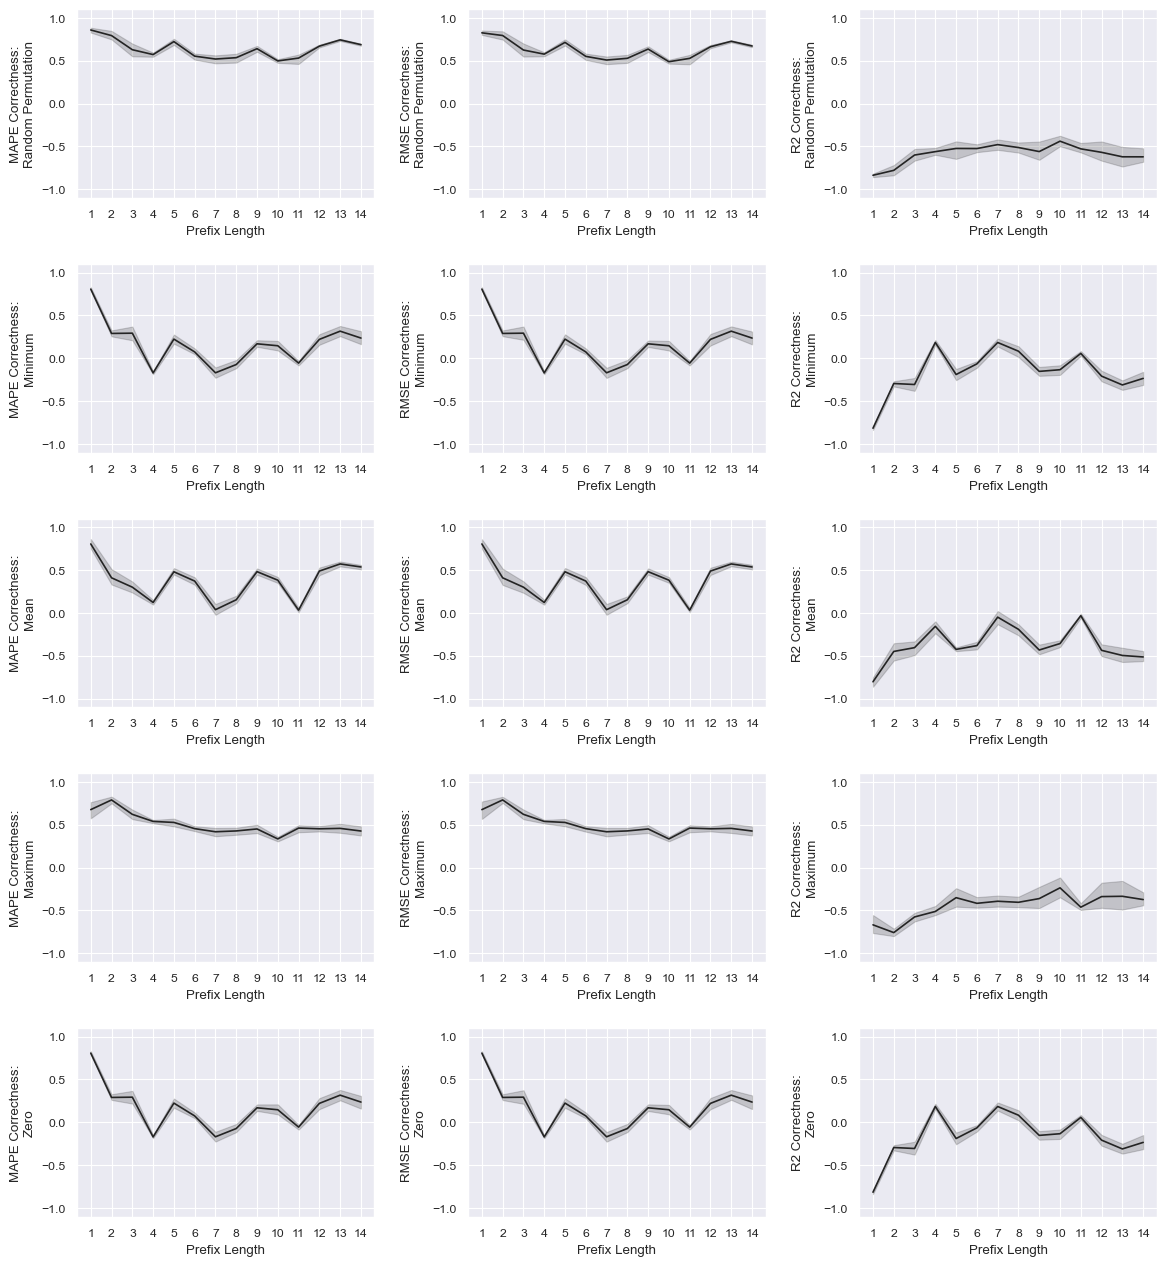

bpic2012_nb_prefix_index.pdf


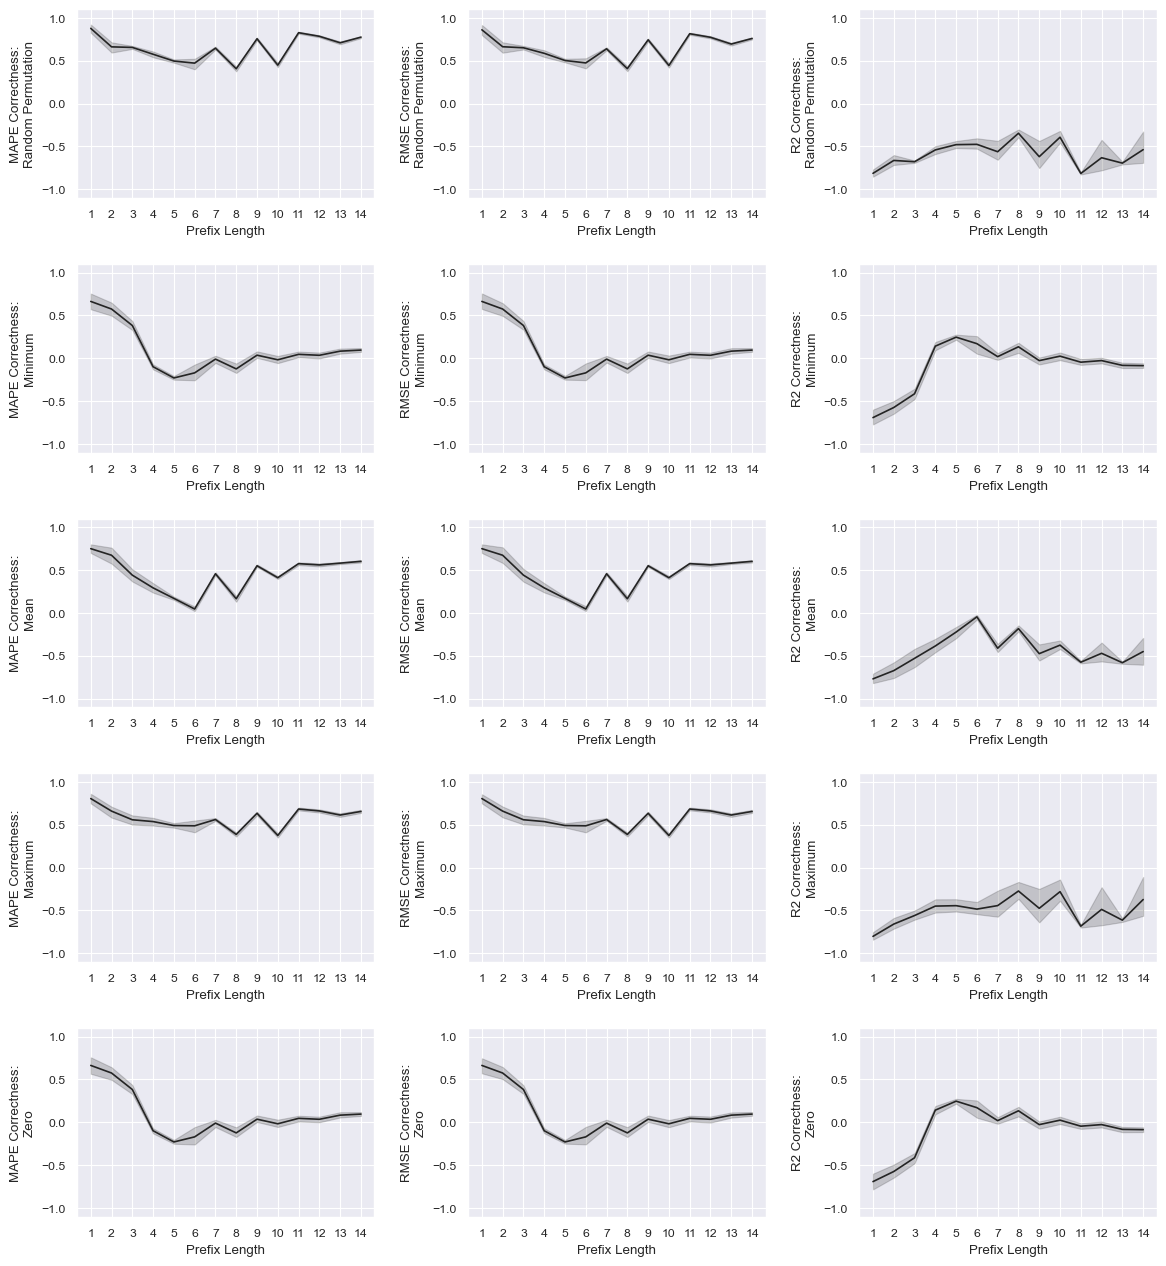

bpic2012_nb_single_agg.pdf


In [ ]:
groups = df.groupby(["Data", "Model", "Pre-processing"])
x_ticks = np.arange(1,15,1)

sns.set_theme(context = "paper", style="darkgrid")
sns.set_palette(palette='gray')

for index, group in groups:
        fig, ax = plt.subplots(5, 3, figsize=(12, 13))
        
        filename = "%s.pdf"%("_".join(index))
        print(filename)

        for i in range(len(perm_methods)):

            perm_method = perm_methods[i]
            sns.lineplot(data = group[group["Mode"]==perm_method], x = "Prefix Length", 
                         y = "MAPE Correctness", errorbar=("ci",95), err_style="band", 
                         ax=ax[i][0], label="Precision", legend=False)
            ax[i][0].set_xticks(x_ticks)
            ax[i][0].set_ylim(-1.1,1.1)
            plt.xlabel("Prefix Length")
            ax[i][0].set_ylabel("MAPE Correctness:\n"+perm_method_map[perm_method])

            sns.lineplot(data = group[group["Mode"]==perm_method], x = "Prefix Length", 
                         y = "RMSE Correctness", errorbar=("ci",95), err_style="band", 
                         ax=ax[i][1], label="Precision", legend=False)
            ax[i][1].set_xticks(x_ticks)
            ax[i][1].set_ylim(-1.1,1.1)
            plt.xlabel("Prefix Length")
            ax[i][1].set_ylabel("RMSE Correctness:\n"+perm_method_map[perm_method])

            sns.lineplot(data = group[group["Mode"]==perm_method], x = "Prefix Length", 
                         y = "R2 Correctness", errorbar=("ci",95), err_style="band", 
                         ax=ax[i][2], label="Precision", legend=False)
            ax[i][2].set_xticks(x_ticks)
            ax[i][2].set_ylim(-1.1,1.1)
            plt.xlabel("Prefix Length")
            ax[i][2].set_ylabel("R2 Correctness:\n"+perm_method_map[perm_method])

        fig.tight_layout(pad=2)
        plt.savefig(os.path.join('figures', "perturbation_fid", filename), format='pdf')

        plt.show()
        #plt.close()